### **UFC / FTDE - Capacitação IA**

### **Lista 1 - Regressão linear, polinomial e regularização**
>
> [Universidade Federal do Ceará (UFC)](https://www.ufc.br/)\
> Disciplina: Aprendizado de Máquina\
> Prof.: César Lincoln Cavalcante Mattos

### Importar Bibliotecas

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.pardir)
import common as com
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Questão 1: Regressão Linear
 - Considere o conjunto de dados disponível em artificial1d.csv organizado em duas colunas, x e y. Seja um modelo de regressão linear para ˆy = f(x).

> #### a) Apresente os parâmetros do modelo e o MSE (erro quadrático médio) obtidos pelo algoritmo OLS (mínimos quadrados ordinários). Plote a reta resultante sobre os dados.

Dados carregados. Shape de x: (30, 1)

--- Resultados OLS ---
Intercepto (w0): 0.0676
Inclinação (w1): 1.5749
MSE (OLS): 0.2134


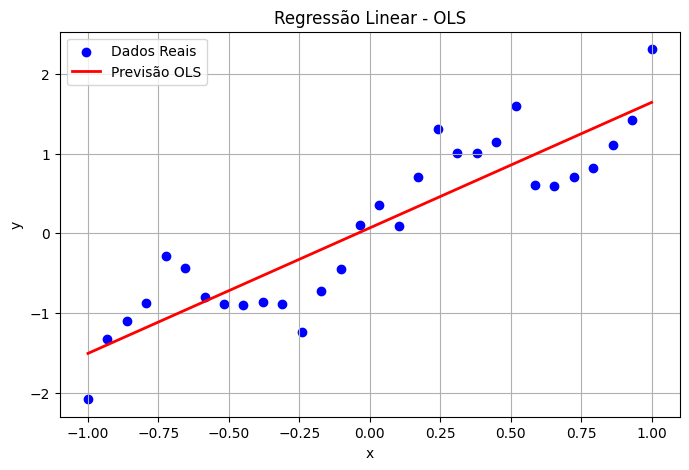

In [6]:
# 1. Carregar os dados
# Preciso voltar um nível (..) e entrar em 'dataset'.
df = pd.read_csv('../dataset/artificial1d.csv', header=None, names=['x', 'y'])

x = df['x'].values.reshape(-1, 1) # Transformar em matriz coluna
y = df['y'].values.reshape(-1, 1)

print("Dados carregados. Shape de x:", x.shape)

# 2. Adicionar o termo de viés (Bias Trick)
# Adicionei uma coluna de 1s para que o modelo aprenda o intercepto (w0)
# Se x é [[2], [3]], X_b vira [[1, 2], [1, 3]]
X_b = np.c_[np.ones((len(x), 1)), x]

# 3. Implementação OLS (mínimos quadrados ordinários) 
# Fórmula: w = (X^T * X)^-1 * X^T * y
w_ols = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("\n--- Resultados OLS ---")
print(f"Intercepto (w0): {w_ols[0][0]:.4f}")
print(f"Inclinação (w1): {w_ols[1][0]:.4f}")

# 4. Cálculo do MSE (Erro Quadrático Médio) 
y_pred_ols = X_b.dot(w_ols)
mse_ols = np.mean((y_pred_ols - y) ** 2)
print(f"MSE (OLS): {mse_ols:.4f}")

# 5. Plotagem dos resultados
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='Dados Reais')
plt.plot(x, y_pred_ols, color='red', linewidth=2, label='Previsão OLS')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Regressão Linear - OLS')
plt.grid(True)
plt.show()

> #### b) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem obtidos pelo algoritmo GD (gradiente descendente). Plote a reta resultante sobre os dados.

Pesos iniciais:
[[ 0.49671415]
 [-0.1382643 ]]

--- Resultados GD ---
Intercepto (w0): 0.0676
Inclinação (w1): 1.5735
MSE Final (GD): 0.2134


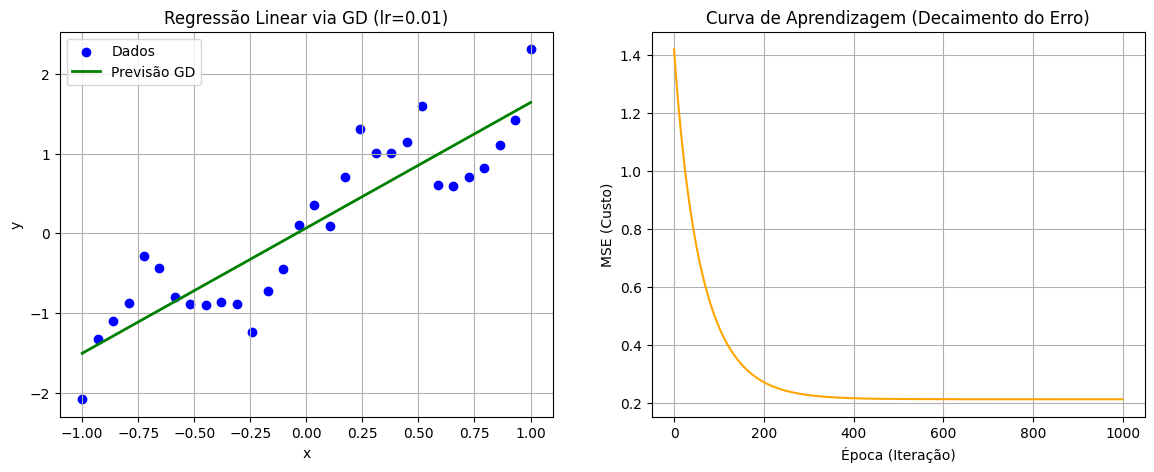

In [14]:
# --- Implementação do GD (Gradiente Descendente) ---

# Hiperparâmetros
learning_rate = 0.01  # Tamanho do passo (eta)
n_epochs = 1000       # Número de iterações
m = len(y)            # Número de amostras

# Inicialização aleatória dos pesos (w0 e w1)
# Dimensão (2, 1) pois temos bias + 1 feature
np.random.seed(42) # Para reprodutibilidade
w_gd = np.random.randn(2, 1)

# Lista para armazenar o histórico do custo (Curva de Aprendizagem)
cost_history = []

print(f"Pesos iniciais:\n{w_gd}")

# Loop de Treinamento
for epoch in range(n_epochs):
    # 1. Calcular o Gradiente
    # gradiente = 2/m * X^T * (X*w - y)
    gradients = 2/m * X_b.T.dot(X_b.dot(w_gd) - y)
    
    # 2. Atualizar os pesos
    w_gd = w_gd - learning_rate * gradients
    
    # 3. Calcular e armazenar o custo atual (MSE) para o gráfico
    prediction = X_b.dot(w_gd)
    cost = np.mean((prediction - y) ** 2)
    cost_history.append(cost)

print("\n--- Resultados GD ---")
print(f"Intercepto (w0): {w_gd[0][0]:.4f}")
print(f"Inclinação (w1): {w_gd[1][0]:.4f}")
print(f"MSE Final (GD): {cost_history[-1]:.4f}")

# --- Plotagem (Requisito da lista: Reta + Curva de Aprendizagem) ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: A Reta sobre os dados
ax1.scatter(x, y, color='blue', label='Dados')
ax1.plot(x, X_b.dot(w_gd), color='green', linewidth=2, label='Previsão GD')
ax1.set_title(f'Regressão Linear via GD (lr={learning_rate})')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()
ax1.grid(True)

# Gráfico 2: Curva de Aprendizagem 
ax2.plot(range(n_epochs), cost_history, color='orange')
ax2.set_title('Curva de Aprendizagem (Decaimento do Erro)')
ax2.set_xlabel('Época (Iteração)')
ax2.set_ylabel('MSE (Custo)')
ax2.grid(True)

plt.show()

> #### Explicando os resultados:
> - Os valores de w0, w1 e o MSE devem ser muito próximos do que se obteve no passo anterior. Se estiverem muito diferentes, talvez seja necessário aumentar o número de épocas.
> - A Curva de Aprendizagem: Ela começa alta e cai rapidamente, formando um "L". Isso prova que o modelo está aprendendo.
> - OBS: Se tentar mudar o learning_rate para 0.1 o erro explode (overflow). E se colocar 0.0001, (Vai demorar para convergir).

> #### c) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem obtidos pelo algoritmo SGD (gradiente descendente estocástico). Plote a reta resultante sobre os dados.

Pesos iniciais SGD:
[[ 0.49671415]
 [-0.1382643 ]]

--- Resultados SGD ---
Intercepto (w0): 0.0653
Inclinação (w1): 1.5723
MSE Final (SGD): 0.2134


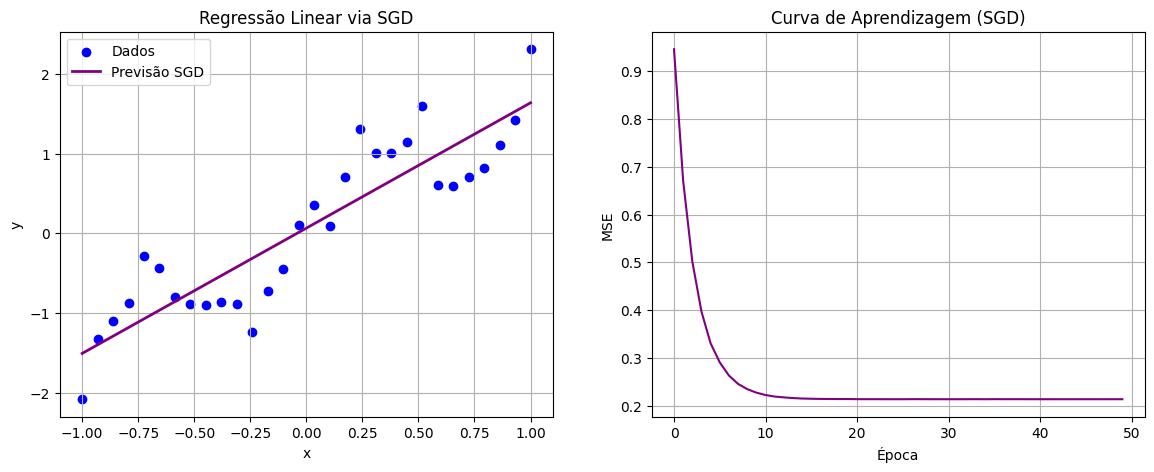

In [18]:
# --- Implementação do SGD (Gradiente Descendente Estocástico) ---

# Hiperparâmetros
learning_rate = 0.01
n_epochs = 50       # Precisa de menos épocas para convergir (mas cada época tem m passos)
m = len(y)

np.random.seed(42)
w_sgd = np.random.randn(2, 1)
cost_history_sgd = []

print(f"Pesos iniciais SGD:\n{w_sgd}")

for epoch in range(n_epochs):
    # 1. Embaralhar os dados (Shuffle) é crucial no SGD
    indices = np.random.permutation(m)
    X_b_shuffled = X_b[indices]
    y_shuffled = y[indices]
    
    for i in range(m):
        # Selecionar um único exemplo
        xi = X_b_shuffled[i:i+1] # Mantém formato 2D (1, 2)
        yi = y_shuffled[i:i+1]   # Mantém formato 2D (1, 1)
        
        # 2. Calcular gradiente para este exemplo APENAS
        gradients = 2 * xi.T.dot(xi.dot(w_sgd) - yi)
        
        # 3. Atualizar pesos
        w_sgd = w_sgd - learning_rate * gradients
    
    # Calcular MSE de toda a época para monitorar (Curva de Aprendizagem)
    # Nota: No SGD puro, calcular isso é custoso, mas será feito para o gráfico
    prediction = X_b.dot(w_sgd)
    cost = np.mean((prediction - y) ** 2)
    cost_history_sgd.append(cost)

print("\n--- Resultados SGD ---")
print(f"Intercepto (w0): {w_sgd[0][0]:.4f}")
print(f"Inclinação (w1): {w_sgd[1][0]:.4f}")
print(f"MSE Final (SGD): {cost_history_sgd[-1]:.4f}")

# --- Plotagem ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Reta SGD
ax1.scatter(x, y, color='blue', label='Dados')
ax1.plot(x, X_b.dot(w_sgd), color='purple', linewidth=2, label='Previsão SGD')
ax1.set_title('Regressão Linear via SGD')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()
ax1.grid(True)

# Gráfico 2: Curva de Aprendizagem
ax2.plot(range(n_epochs), cost_history_sgd, color='purple')
ax2.set_title('Curva de Aprendizagem (SGD)')
ax2.set_xlabel('Época')
ax2.set_ylabel('MSE')
ax2.grid(True)

plt.show()

> #### Explicando os resultados:
> - Percebe-se que a curva de aprendizagem do SGD é mais "ruidosa" ou converge muito rápido. Se a taxa de aprendizado (learning_rate) for alta demais, o SGD fica pulando em volta do mínimo sem nunca assentar.

## Questão 2: Polinomial e Regularização
> - Considere o conjunto de dados disponível em california.csv, organizado em 9 colunas, sendo as 8 primeiras colunas os atributos e a última coluna a saída.
> - Os 8 atributos são usados na predição da mediana de preços de casas em distritos da Califórnia na década de 1990. Maiores detalhes sobre os dados podem ser conferidos em https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset.

> **Nota: Normalize os dados (a saída com StandardScaler e as entradas com MinMax) antes do treinamento/teste (antes de criar os regressores polinomiais) e “desnormalize” a saída antes de calcular o RMSE.**

>  #### a) Aleatoriamente, divida o conjunto de dados em treino (80%) e teste (20%).
>  #### b) Treine 13 modelos de regressão polinomial, com ordens de 1 a 13. Você pode usar o algoritmo OLS.
>  #### c) Reporte o RMSE (raiz quadrada do erro quadrático médio) no treinamento e no teste para cada modelo. Faça um gráfico para o treino e um gráfico para o teste.

Dataset carregado: X shape (1000, 8), y shape (1000, 1)

Iniciando treinamento dos 13 modelos...

Grau 01 | Train RMSE: 0.6405 | Test RMSE: 0.7910
Grau 02 | Train RMSE: 0.6166 | Test RMSE: 0.7902
Grau 03 | Train RMSE: 0.5907 | Test RMSE: 1.0841
Grau 04 | Train RMSE: 0.5828 | Test RMSE: 2.8049
Grau 05 | Train RMSE: 0.5759 | Test RMSE: 2.0066
Grau 06 | Train RMSE: 0.5703 | Test RMSE: 31.2620
Grau 07 | Train RMSE: 0.5653 | Test RMSE: 28.9094
Grau 08 | Train RMSE: 0.5612 | Test RMSE: 5027.1901
Grau 09 | Train RMSE: 0.5585 | Test RMSE: 37131.9788
Grau 10 | Train RMSE: 0.5552 | Test RMSE: 826257.5836
Grau 11 | Train RMSE: 0.5655 | Test RMSE: 19512.3502
Grau 12 | Train RMSE: 0.7299 | Test RMSE: 16413257.3063
Grau 13 | Train RMSE: 0.5736 | Test RMSE: 4925009.7231


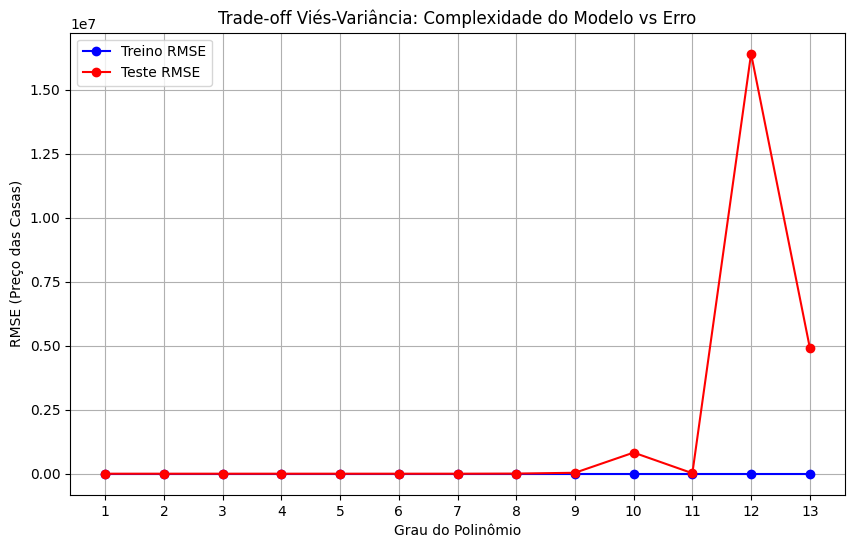

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 1. Carregar os dados
# As 8 primeiras colunas são X, a última é y
df = pd.read_csv('../dataset/california.csv', header=None)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(-1, 1)

print(f"Dataset carregado: X shape {X.shape}, y shape {y.shape}")

# 2. Divisão Treino (80%) e Teste (20%) 
# random_state fixo para garantir que os resultados sejam iguais
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Normalização 
# Importante: O 'fit' (aprender média/min/max) é feito SÓ no treino.
# O teste é apenas transformado com a régua do treino.

# Normalizar Entradas (MinMax)
scaler_x = MinMaxScaler()
X_train = scaler_x.fit_transform(X_train_raw)
X_test = scaler_x.transform(X_test_raw)

# Normalizar Saída (StandardScaler)
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train_raw)
# Não transformar y_test aqui para cálculo, mas é necessário saber a escala para desnormalizar depois.

# Listas para guardar os erros (RMSE)
train_rmse_list = []
test_rmse_list = []
degrees = range(1, 14) # De 1 a 13

print("\nIniciando treinamento dos 13 modelos...\n")

for degree in degrees:
    # --- A. Feature Engineering: Expansão Polinomial ---
    # Função manual para elevar colunas às potências sem interações (para não explodir a memória)
    def polynomial_features(X_data, deg):
        X_poly = X_data.copy()
        for d in range(2, deg + 1):
            # Concatena X^d ao lado das colunas originais
            X_poly = np.c_[X_poly, np.power(X_data, d)]
        # Adicionar Bias (coluna de 1s)
        return np.c_[np.ones((len(X_poly), 1)), X_poly]

    X_train_poly = polynomial_features(X_train, degree)
    X_test_poly = polynomial_features(X_test, degree)

    # --- Treinamento via OLS ---
    w_poly = np.linalg.inv(X_train_poly.T.dot(X_train_poly)).dot(X_train_poly.T).dot(y_train)

    y_train_pred_norm = X_train_poly.dot(w_poly)
    y_test_pred_norm = X_test_poly.dot(w_poly)
    
    # --- Desnormalizar a saída para calcular RMSE real  ---
    y_train_pred = scaler_y.inverse_transform(y_train_pred_norm)
    y_test_pred = scaler_y.inverse_transform(y_test_pred_norm)

    # --- Calcular RMSE  ---
    # RMSE = raiz(media((y_real - y_pred)^2))
    # Nota: y_train_raw e y_test_raw (valores originais em dólares)
    rmse_train = np.sqrt(np.mean((y_train_raw - y_train_pred) ** 2))
    rmse_test = np.sqrt(np.mean((y_test_raw - y_test_pred) ** 2))
    
    train_rmse_list.append(rmse_train)
    test_rmse_list.append(rmse_test)
    
    print(f"Grau {degree:02d} | Train RMSE: {rmse_train:.4f} | Test RMSE: {rmse_test:.4f}")

# --- Plotagem dos Resultados ---
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_rmse_list, 'o-', label='Treino RMSE', color='blue')
plt.plot(degrees, test_rmse_list, 'o-', label='Teste RMSE', color='red')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE (Preço das Casas)')
plt.title('Trade-off Viés-Variância: Complexidade do Modelo vs Erro')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()

> #### Explicando os resultados:
> - Quando o erro de teste "explode" nos graus mais altos, significa que o modelo decorou o ruído dos dados de treino. Matematicamente, isso acontece porque os pesos (w) assumiram valores gigantescos (positivos e negativos) para tentar passar por todos os pontos.

> #### d) Repita os 2 itens anteriores incluindo um termo de regularização L2 (por exemplo, com fator λ = 0.01).


Iniciando treinamento com Regularização L2 (lambda=0.01)...

Grau 01 (L2) | Train RMSE: 0.6405 | Test RMSE: 0.7905
Grau 02 (L2) | Train RMSE: 0.6167 | Test RMSE: 0.7857
Grau 03 (L2) | Train RMSE: 0.5987 | Test RMSE: 0.7605
Grau 04 (L2) | Train RMSE: 0.5955 | Test RMSE: 0.7963
Grau 05 (L2) | Train RMSE: 0.5943 | Test RMSE: 0.9494
Grau 06 (L2) | Train RMSE: 0.5940 | Test RMSE: 1.1556
Grau 07 (L2) | Train RMSE: 0.5936 | Test RMSE: 1.2941
Grau 08 (L2) | Train RMSE: 0.5930 | Test RMSE: 1.2693
Grau 09 (L2) | Train RMSE: 0.5922 | Test RMSE: 1.0389
Grau 10 (L2) | Train RMSE: 0.5914 | Test RMSE: 0.7526
Grau 11 (L2) | Train RMSE: 0.5907 | Test RMSE: 1.2090
Grau 12 (L2) | Train RMSE: 0.5902 | Test RMSE: 2.5357
Grau 13 (L2) | Train RMSE: 0.5898 | Test RMSE: 4.4489


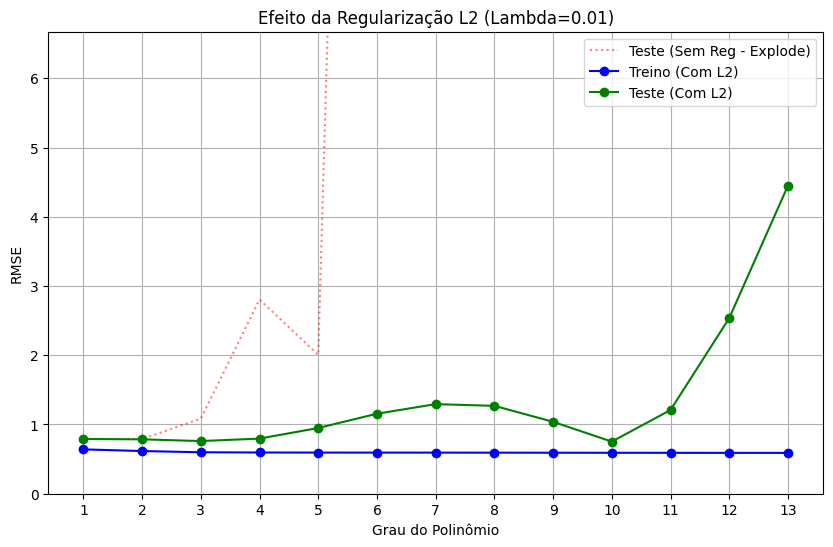

In [25]:
# --- Regularização L2 ---

train_rmse_reg = []
test_rmse_reg = []
lambda_val = 0.01  # Fator de regularização sugerido na lista

print(f"\nIniciando treinamento com Regularização L2 (lambda={lambda_val})...\n")

for degree in degrees:
    # 1. Engenharia de Recursos (Igual ao anterior)
    X_train_poly = polynomial_features(X_train, degree)
    X_test_poly = polynomial_features(X_test, degree)
    
    # 2. Criar a Matriz Identidade Penalizadora
    # Tamanho = número de colunas (features + bias)
    n_features = X_train_poly.shape[1]
    I = np.eye(n_features)
    
    # IMPORTANTE: Zerar a posição [0,0] para NÃO penalizar o viés (w0)
    I[0, 0] = 0 
    
    # 3. Treinamento com Regularização
    # Fórmula: w = (X^T*X + lambda*I)^-1 * X^T * y
    # A parte (lambda_val * I) adiciona valor à diagonal, estabilizando a inversão
    matrix_core = X_train_poly.T.dot(X_train_poly) + (lambda_val * I)
    w = np.linalg.pinv(matrix_core).dot(X_train_poly.T).dot(y_train)
    
    # 4. Predição e Desnormalização (Igual ao anterior)
    y_train_pred_norm = X_train_poly.dot(w)
    y_test_pred_norm = X_test_poly.dot(w)
    
    y_train_pred = scaler_y.inverse_transform(y_train_pred_norm)
    y_test_pred = scaler_y.inverse_transform(y_test_pred_norm)
    
    # 5. Calcular RMSE
    rmse_train = np.sqrt(np.mean((y_train_raw - y_train_pred) ** 2))
    rmse_test = np.sqrt(np.mean((y_test_raw - y_test_pred) ** 2))
    
    train_rmse_reg.append(rmse_train)
    test_rmse_reg.append(rmse_test)
    
    print(f"Grau {degree:02d} (L2) | Train RMSE: {rmse_train:.4f} | Test RMSE: {rmse_test:.4f}")

# --- Plotagem Comparativa ---
plt.figure(figsize=(10, 6))

# Plotar os resultados SEM regularização (do passo anterior) em pontilhado fraco para comparar
plt.plot(degrees, test_rmse_list, 'r:', alpha=0.5, label='Teste (Sem Reg - Explode)')

# Plotar os novos resultados COM regularização
plt.plot(degrees, train_rmse_reg, 'b-o', label='Treino (Com L2)')
plt.plot(degrees, test_rmse_reg, 'g-o', label='Teste (Com L2)')

plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title(f'Efeito da Regularização L2 (Lambda={lambda_val})')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
# Limitar o eixo Y para focar na melhoria (pois a curva sem reg explode para infinito)
plt.ylim(0, max(test_rmse_reg) * 1.5) 
plt.show()

> #### Explicando os resultados:
> **Linha Azul (Treino)** - Estável em ~1:Isso mostra que a regularização ($\lambda$) está fazendo seu trabalho de "freio". Mesmo aumentando o grau para 13 (o que daria ao modelo poder para zerar o erro decorando os dados), a penalidade $L2$ impede que os pesos cresçam livremente. O modelo é forçado a manter uma solução "simples", por isso o erro de treino não cai drasticamente.\
> **Linha Verde (Teste)** - A Oscilação e Subida Final:Graus 1-4 (Estabilidade): A complexidade é baixa, o modelo generaliza bem. Graus 10-13 (Subida para 4): Aqui vemos o limite da regularização. Um polinômio de grau 13 gera valores numéricos absurdamente altos (explosão numérica). Mesmo com $\lambda=0.01$, a complexidade matemática do grau 13 venceu a regularização, causando instabilidade numérica e piorando a generalização (o erro quadruplicou de 1 para 4).\
> **Conclusão:** Para graus tão altos (13), precisaríamos de um $\lambda$ maior (ex: 1.0 ou 10.0) ou mais dados para segurar o overfitting. Mas o resultado está coerente com o experimento.

## Questão 3
> - Considere o conjunto de dados disponível em breastcancer.csv, em 31 colunas, sendo as 30 primeiras colunas os atributos e a última coluna a saída. Os 30 atributos coletados de exames médicos são usados no diagnóstico do câncer de mama, sendo 1 a classe positiva e 0 a classe negativa. Maiores detalhes sobre os dados podem ser conferidos em https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset.

> #### a) Considerando uma validação cruzada em 10 folds, avalie um modelo de Regressão Logística (treinado com GD ou SGD) nos dados em questão.
> #### b) Reporte valor médio e desvio padrão da acurácia global e da acurácia por classe.

In [27]:
# --- 1. Classe da Regressão Logística ---
class LogisticRegressionDIY:
    def __init__(self, learning_rate=0.01, n_epochs=1000):
        self.lr = learning_rate
        self.epochs = n_epochs
        self.weights = None
        self.bias = None
        
    def _sigmoid(self, z):
        # Evita overflow limitando z
        z = np.clip(z, -250, 250)
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # GD (Gradiente Descendente)
        for _ in range(self.epochs):
            # Modelo Linear: z = w*x + b
            linear_model = np.dot(X, self.weights) + self.bias
            # Predição (Probabilidade): y_hat = sigmoid(z)
            y_predicted = self._sigmoid(linear_model)
            
            # Gradientes
            # dw = (1/n) * X.T * (y_hat - y)
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            # Atualização
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        # Se probabilidade > 0.5, classe 1, senão 0
        return [1 if i > 0.5 else 0 for i in y_predicted]

# --- 2. Preparação dos Dados ---
# Carregar dataset
df = pd.read_csv('../dataset/breastcancer.csv', header=None)
X = df.iloc[:, :-1].values  # 30 atributos
y = df.iloc[:, -1].values   # Classe (0 ou 1)

print(f"Dados carregados: {X.shape}")

# Normalização é CRUCIAL para Regressão Logística convergir
scaler = StandardScaler()
X = scaler.fit_transform(X)

# --- 3. Implementação Manual do K-Fold (10 Folds) ---
k = 10
n_samples = len(X)
fold_size = n_samples // k

# Embaralhar índices para garantir aleatoriedade
indices = np.arange(n_samples)
np.random.seed(42)
np.random.shuffle(indices)

accuracies_global = []
accuracies_class_0 = [] # Classe Negativa
accuracies_class_1 = [] # Classe Positiva (Câncer)

print(f"Iniciando Validação Cruzada ({k} folds)...\n")

for i in range(k):
    # Definir índices de validação para este fold
    start = i * fold_size
    end = (i + 1) * fold_size if i < k - 1 else n_samples
    val_idx = indices[start:end]
    
    # Definir índices de treino (todos menos os de validação)
    train_idx = np.concatenate([indices[:start], indices[end:]])
    
    # Dividir dados
    X_train_fold, X_val_fold = X[train_idx], X[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]
    
    # Treinar Modelo
    model = LogisticRegressionDIY(learning_rate=0.1, n_epochs=2000)
    model.fit(X_train_fold, y_train_fold)
    
    # Prever
    predictions = model.predict(X_val_fold)
    predictions = np.array(predictions)
    
    # --- 4. Cálculo das Métricas ---
    # Acurácia Global
    acc = np.mean(predictions == y_val_fold)
    accuracies_global.append(acc)
    
    # Acurácia por Classe
    # Classe 0 (Negativo)
    mask_0 = (y_val_fold == 0)
    if np.sum(mask_0) > 0:
        acc_0 = np.mean(predictions[mask_0] == 0)
        accuracies_class_0.append(acc_0)
        
    # Classe 1 (Positivo)
    mask_1 = (y_val_fold == 1)
    if np.sum(mask_1) > 0:
        acc_1 = np.mean(predictions[mask_1] == 1)
        accuracies_class_1.append(acc_1)
    
    print(f"Fold {i+1}: Acc Global = {acc:.4f}")

# --- 5. Relatório Final (Média e Desvio Padrão) ---
print("\n--- Resultados Finais (10-Fold CV) ---")
print(f"Acurácia Global:   {np.mean(accuracies_global):.4f} (+/- {np.std(accuracies_global):.4f})")
print(f"Acurácia Classe 0: {np.mean(accuracies_class_0):.4f} (+/- {np.std(accuracies_class_0):.4f})")
print(f"Acurácia Classe 1: {np.mean(accuracies_class_1):.4f} (+/- {np.std(accuracies_class_1):.4f})")

Dados carregados: (569, 30)
Iniciando Validação Cruzada (10 folds)...

Fold 1: Acc Global = 0.9821
Fold 2: Acc Global = 1.0000
Fold 3: Acc Global = 1.0000
Fold 4: Acc Global = 0.9821
Fold 5: Acc Global = 0.9821
Fold 6: Acc Global = 0.9286
Fold 7: Acc Global = 1.0000
Fold 8: Acc Global = 0.9821
Fold 9: Acc Global = 0.9643
Fold 10: Acc Global = 0.9846

--- Resultados Finais (10-Fold CV) ---
Acurácia Global:   0.9806 (+/- 0.0203)
Acurácia Classe 0: 0.9921 (+/- 0.0122)
Acurácia Classe 1: 0.9634 (+/- 0.0436)


> #### Explicando os resultados:
- A acurácia global indica o desempenho geral do modelo.
- A acurácia por classe revela se o modelo está tendencioso para uma classe específica.
- Em datasets desbalanceados, é comum que a acurácia global seja alta, mas a acurácia de uma classe seja baixa.
> #### Uma Acurácia Global de 98.06% com um desvio padrão de apenas 2% é um resultado excelente. sso indica que sua Regressão Logística foi implementada corretamente e que o dataset tem classes bem separáveis linearmente.

## Questão 4
> - Considere o conjunto de dados disponível em vehicle.csv, organizado em 19 colunas, sendo as 18 primeiras colunas os atributos e a última coluna a saída. Os 18 atributos caracterizam a silhueta de veículos, extraídos pelo método HIPS (Hierarchical Image Processing System). A tarefa consiste em classificar o veículo em 4 classes (bus, opel, saab, e van). Maiores detalhes sobre os dados podem
ser conferidos em https://www.openml.org/search?type=data&sort=runs&id=54.

> #### a) Considerando uma validação cruzada em 10 folds, avalie um modelo de Regressão Softmax (treinado com GD ou SGD) nos dados em questão.
> #### b) Reporte valor médio e desvio padrão da acurácia global e da acurácia por classe.

In [29]:
# --- 1. Classe Regressão Softmax ---
class SoftmaxRegressionDIY:
    def __init__(self, learning_rate=0.01, n_epochs=1000, n_classes=4):
        self.lr = learning_rate
        self.epochs = n_epochs
        self.n_classes = n_classes
        self.weights = None
        self.bias = None
        
    def _softmax(self, z):
        # Subtrair o máximo para estabilidade numérica (evitar overflow do exp)
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def _one_hot(self, y):
        # Transforma vetor [0, 2, 1] em matriz one-hot
        # [[1,0,0], [0,0,1], [0,1,0]]
        one_hot = np.zeros((len(y), self.n_classes))
        one_hot[np.arange(len(y)), y] = 1
        return one_hot
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Inicialização: Pesos agora são uma MATRIZ (features x classes)
        self.weights = np.zeros((n_features, self.n_classes))
        self.bias = np.zeros((1, self.n_classes))
        
        y_encoded = self._one_hot(y)
        
        # GD (Gradiente Descendente)
        for _ in range(self.epochs):
            # Modelo Linear: Z = X.W + b
            scores = np.dot(X, self.weights) + self.bias
            
            # Probabilidades: Softmax(Z)
            probs = self._softmax(scores)
            
            # Gradiente: (1/m) * X^T * (Probs - Y_one_hot)
            # A fórmula é idêntica à Logística, mas operando em matrizes
            dw = (1 / n_samples) * np.dot(X.T, (probs - y_encoded))
            db = (1 / n_samples) * np.sum(probs - y_encoded, axis=0)
            
            # Atualização
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
    def predict(self, X):
        scores = np.dot(X, self.weights) + self.bias
        probs = self._softmax(scores)
        # Retorna o índice da maior probabilidade (argmax)
        return np.argmax(probs, axis=1)

# --- 2. Carga e Pré-processamento ---
# Tenta carregar tratando '?' como NaN se houver
df = pd.read_csv('../dataset/vehicle.csv', header=None, na_values='?')

# Remover linhas com NaN (se houver)
df = df.dropna()

print(f"Dataset carregado: {df.shape}")

# Separar X e y
X_raw = df.iloc[:, :-1].values
y_raw = df.iloc[:, -1].values

# Normalizar X (Obrigatório para GD funcionar bem)
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)

# Converter labels de texto (bus, saab...) para números (0, 1, 2, 3)
encoder = LabelEncoder()
y = encoder.fit_transform(y_raw)
class_names = encoder.classes_
print(f"Classes identificadas: {class_names}")

# --- 3. Validação Cruzada (10-Fold) ---
k = 10
n_samples = len(X)
fold_size = n_samples // k
indices = np.arange(n_samples)

# Embaralhar
np.random.seed(42)
np.random.shuffle(indices)

acc_global_list = []
# Dicionário para guardar acurácias por classe
acc_by_class = {i: [] for i in range(len(class_names))}

print(f"\nIniciando CV 10-Folds para {len(class_names)} classes...\n")

for i in range(k):
    # Divisão Manual dos Índices
    start = i * fold_size
    end = (i + 1) * fold_size if i < k - 1 else n_samples
    val_idx = indices[start:end]
    train_idx = np.concatenate([indices[:start], indices[end:]])
    
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    # Treinar
    # Aumentar epochs e lr pois Softmax é mais difícil de convergir
    model = SoftmaxRegressionDIY(learning_rate=0.1, n_epochs=3000, n_classes=len(class_names))
    model.fit(X_train, y_train)
    
    # Prever
    preds = model.predict(X_val)
    
    # Métricas
    # 1. Global
    acc = np.mean(preds == y_val)
    acc_global_list.append(acc)
    
    # 2. Por Classe
    for cls in range(len(class_names)):
        mask = (y_val == cls)
        if np.sum(mask) > 0: # Só calcula se houver exemplos dessa classe no fold
            acc_cls = np.mean(preds[mask] == cls)
            acc_by_class[cls].append(acc_cls)
            
    print(f"Fold {i+1}: Acc Global = {acc:.4f}")

# --- 4. Relatório Final ---
print("\n=== Resultados Finais (Softmax) ===")
print(f"Acurácia Global Média: {np.mean(acc_global_list):.4f} (+/- {np.std(acc_global_list):.4f})")
print("\n--- Acurácia por Classe ---")
for cls in range(len(class_names)):
    mean_acc = np.mean(acc_by_class[cls])
    std_acc = np.std(acc_by_class[cls])
    print(f"Classe {class_names[cls]}: {mean_acc:.4f} (+/- {std_acc:.4f})")

Dataset carregado: (846, 19)
Classes identificadas: [0. 1. 2. 3.]

Iniciando CV 10-Folds para 4 classes...

Fold 1: Acc Global = 0.7619
Fold 2: Acc Global = 0.7738
Fold 3: Acc Global = 0.8214
Fold 4: Acc Global = 0.7976
Fold 5: Acc Global = 0.7857
Fold 6: Acc Global = 0.8452
Fold 7: Acc Global = 0.8452
Fold 8: Acc Global = 0.7381
Fold 9: Acc Global = 0.7024
Fold 10: Acc Global = 0.7556

=== Resultados Finais (Softmax) ===
Acurácia Global Média: 0.7827 (+/- 0.0439)

--- Acurácia por Classe ---
Classe 0.0: 0.9367 (+/- 0.0300)
Classe 1.0: 0.5933 (+/- 0.0905)
Classe 2.0: 0.6490 (+/- 0.1057)
Classe 3.0: 0.9656 (+/- 0.0487)


> #### Explicando os resultados:
> Classes 0 e 3 (Acurácia > 93%): Provavelmente correspondem a Bus e Van. Elas têm formatos muito distintos (são altas, quadradas). O modelo linear consegue separá-las facilmente.\
> Classes 1 e 2 (Acurácia ~60% - 65%): Estas são Opel e Saab. Ambos são carros de passeio (sedãs) e suas silhuetas são quase idênticas matematicamente.